In [1]:
import pandas as pd
import numpy as np

from constants import numeric_columns as num_cols


# df = pd.read_csv('dm1_dataset_2425_imdb/train.csv')
df = pd.read_csv('pp_train.csv')

df

originalTitle  rating  startYear  endYear  \
0      Neogenic Nightmare Chapter 3: Hydro-Man       8       1995      NaN   
1                                      Looping       6       1982      NaN   
2                               Idealnaya para       6       1992      NaN   
3                  MasterChef Celebrity México       6       2021      NaN   
4                                  Seutateueob       8       2020   2020.0   
...                                        ...     ...        ...      ...   
16426                                 Caprices       6       1942      NaN   
16427                                Haar Jeet       5       1990      NaN   
16428                              Kotigobba 3       6       2021      NaN   
16429                       Ator l'invincibile       4       1982      NaN   
16430                        Anniversary Night      10       2022      NaN   

       runtimeMinutes  awardWins  numVotes  totalImages  totalVideos  \
0                 NaN        0.0       779            1            0   
1                 NaN        0.0        11            1            0   
2                 NaN        0.0        38            1            0   
3                 NaN        0.0        15           22            0   
4                80.0        1.0     15718          347            2   
...               ...        ...       ...          ...          ...   
16426             NaN        0.0        73            4            0   
16427             NaN        0.0        15            2            0   
16428           140.0        0.0      2560           39            3   
16429             NaN        0.0      3011           52            1   
16430             NaN        0.0         9            7            0   

       totalCredits  ...  is_War is_Horror  is_Animation  fill_runtimeMinutes  \
0                21  ...       0         0             1                 40.0   
1                 1  ...       0         0             0                 28.0   
2                24  ...       0         0             0                 90.0   
3                56  ...       0         0             0                 31.0   
4                47  ...       0         0             0                 80.0   
...             ...  ...     ...       ...           ...                  ...   
16426            45  ...       0         0             0                 90.0   
16427            22  ...       0         0             0                 90.0   
16428           129  ...       0         0             0                140.0   
16429            53  ...       0         0             0                 90.0   
16430            19  ...       0         0             0                 12.0   

       is_from_Oceania  is_from_North America  is_from_South America  \
0                    0                      1                      0   
1                    0                      0                      0   
2                    0                      0                      0   
3                    0                      1                      0   
4                    0                      0                      0   
...                ...                    ...                    ...   
16426                0                      0                      0   
16427                0                      0                      0   
16428                0                      0                      0   
16429                0                      0                      0   
16430                0                      0                      0   

       is_from_Asia  is_from_Africa  is_from_Europe  
0                 0               0               0  
1                 0               0               1  
2                 0               0               1  
3                 0               0               0  
4                 1               0               0  
...             ...             ...             ...  
16426          

In [2]:
# possible useful columns for this task:
# rating, startYear, runtimeMinutes, awardWins, numVotes,
# totalImages, totalVideos, totalCredits, criticReviewsTotal,
# awardNominationsExcludeWins, canHaveEpisodes (?), isAdult,
# numRegions, userReviewsTotal, ratingCount,
# genres (as 1henc or as a count?)
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal',
       'is_Documentary', 'is_History', 'is_Adventure', 'is_Thriller',
       'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography',
       'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult',
       'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime', 'is_Short',
       'is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama',
       'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
       'fill_runtimeMinutes', 'is_from_Oceania', 'is_from_North America',
       'is_from_South America', 'is_from_Asia', 'is_from_Africa',
       'is_from_Europe'],
      dtype='object')

In [3]:
df['rating'].unique()

array([ 8,  6,  9,  7,  3,  5, 10,  4,  1,  2])

In [4]:
# swaps the rating column to contain only the integer values of the higher bounds
# df['rating'] = df['rating'].str.extract(
#         r",\s*(\d+)\]"
#     ).astype(int)

# df

In [5]:
# for col in num_cols:
#     df[col] = pd.to_numeric(df[col], errors='coerce')
# # train_df[num_cols] = pd.to_numeric(train_df[num_cols], errors='coerce')

# df.loc[df['genres'] == r'\N', 'genres'] = np.nan
# df

In [6]:
df['awardWins'].fillna(0, inplace=True)
df['totalNominations'] = df['awardWins'] + df['awardNominationsExcludeWins']
df['totalNominations']

/var/folders/68/gjrvx3m51494g9gp2r93j3vh0000gn/T/ipykernel_39177/2979209826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['awardWins'].fillna(0, inplace=True)


0        0.0
1        0.0
2        0.0
3        0.0
4        2.0
        ... 
16426    0.0
16427    0.0
16428    5.0
16429    0.0
16430    0.0
Name: totalNominations, Length: 16431, dtype: float64

In [7]:
df.groupby('totalNominations').count()

originalTitle  rating  startYear  endYear  runtimeMinutes  \
totalNominations                                                              
0.0                       13692   13692      13692      581            9431   
1.0                        1016    1016       1016       62             787   
2.0                         504     504        504       43             400   
3.0                         252     252        252       24             203   
4.0                         213     213        213       21             164   
...                         ...     ...        ...      ...             ...   
152.0                         1       1          1        0               1   
160.0                         1       1          1        0               1   
170.0                         1       1          1        0               1   
172.0                         2       2          2        0               2   
306.0                         1       1          1        0               1   

                  awardWins  numVotes  totalImages  totalVideos  totalCredits  \
totalNominations                                                                
0.0                   13692     13692        13692        13692         13692   
1.0                    1016      1016         1016         1016          1016   
2.0                     504       504          504          504           504   
3.0                     252       252          252          252           252   
4.0                     213       213          213          213           213   
...                     ...       ...          ...          ...           ...   
152.0                     1         1            1            1             1   
160.0                     1         1            1            1             1   
170.0                     1         1            1            1             1   
172.0                     2         2            2            2             2   
306.0                     1         1            1            1             1   

                  ...  is_War  is_Horror  is_Animation  fill_runtimeMinutes  \
totalNominations  ...                                                         
0.0               ...   13692      13692         13692                13692   
1.0               ...    1016       1016          1016                 1016   
2.0               ...     504        504           504                  504   
3.0               ...     252        252           252                  252   
4.0               ...     213        213           213                  213   
...               ...     ...        ...           ...                  ...   
152.0             ...       1          1             1                    1   
160.0             ...       1          1             1                    1   
170.0             ...       1          1             1                    1   
172.0             ...       2          2             2                    2   
306.0             ...       1          1             1                    1   

                  is_from_Oceania  is_from_North America  \
totalNominations                                           
0.0                         13692                  13692   
1.0                          1016                   1016   
2.0                           504                    504   
3.0                           252                    252   
4.0                           213                    213   
...                           ...                    ...   
152.0                           1                      1   
160.0                           1                      1   
170.0                           1                      1   
172.0                           2                      2   
306.0                           1                      1   

                  is_from_South America  is_from_Asia  is_from_Africa  \
totalNominations                                      

In [8]:
df.loc[df['runtimeMinutes'].isna()].groupby('titleType').count()

originalTitle  rating  startYear  endYear  runtimeMinutes  \
titleType                                                                 
movie                  1225    1225       1225        0               0   
short                   582     582        582        0               0   
tvEpisode              1469    1469       1469        0               0   
tvMiniSeries            120     120        120       60               0   
tvMovie                 212     212        212        0               0   
tvSeries                676     676        676      279               0   
tvShort                   1       1          1        0               0   
tvSpecial                72      72         72        0               0   
video                   238     238        238        0               0   
videoGame               257     257        257        0               0   

              awardWins  numVotes  totalImages  totalVideos  totalCredits  \
titleType                                                                   
movie              1225      1225         1225         1225          1225   
short               582       582          582          582           582   
tvEpisode          1469      1469         1469         1469          1469   
tvMiniSeries        120       120          120          120           120   
tvMovie             212       212          212          212           212   
tvSeries            676       676          676          676           676   
tvShort               1         1            1            1             1   
tvSpecial            72        72           72           72            72   
video               238       238          238          238           238   
videoGame           257       257          257          257           257   

              ...  is_Horror  is_Animation  fill_runtimeMinutes  \
titleType     ...                                                 
movie         ...       1225          1225                 1225   
short         ...        582           582                  582   
tvEpisode     ...       1469          1469                 1469   
tvMiniSeries  ...        120           120                  120   
tvMovie       ...        212           212                  212   
tvSeries      ...        676           676                  676   
tvShort       ...          1             1                    1   
tvSpecial     ...         72            72                   72   
video         ...        238           238                  238   
videoGame     ...        257           257                  257   

              is_from_Oceania  is_from_North America  is_from_South America  \
titleType                                                                     
movie                    1225                   1225                   1225   
short                     582                    582                    582   
tvEpisode                1469                   1469                   1469   
tvMiniSeries              120                    120                    120   
tvMovie                   212                    212                    212   
tvSeries                  676                    676                    676   
tvShort                     1                      1                      1   
tvSpecial                  72                     72                     72   
video                     238                    238                    238   
videoGame                 257                    257                    257   

              is_from_Asia  is_from_Africa  is_from_Europe  totalNominations  
titleType                                                                     
movie                 1225            1225            1225              1225  
short                  582             582             582               582  
tvEpisode             1469            1469            1469              1469  
tvMiniSeries           120             

In [9]:
df.groupby('titleType').count()

originalTitle  rating  startYear  endYear  runtimeMinutes  \
titleType                                                                 
movie                  5535    5535       5535        0            4310   
short                  2474    2474       2474        0            1892   
tvEpisode              4698    4698       4698        0            3229   
tvMiniSeries            224     224        224      121             104   
tvMovie                 868     868        868        0             656   
tvSeries               1375    1375       1375      693             699   
tvShort                  40      40         40        0              39   
tvSpecial               166     166        166        0              94   
video                   792     792        792        0             554   
videoGame               259     259        259        0               2   

              awardWins  numVotes  totalImages  totalVideos  totalCredits  \
titleType                                                                   
movie              5535      5535         5535         5535          5535   
short              2474      2474         2474         2474          2474   
tvEpisode          4698      4698         4698         4698          4698   
tvMiniSeries        224       224          224          224           224   
tvMovie             868       868          868          868           868   
tvSeries           1375      1375         1375         1375          1375   
tvShort              40        40           40           40            40   
tvSpecial           166       166          166          166           166   
video               792       792          792          792           792   
videoGame           259       259          259          259           259   

              ...  is_Horror  is_Animation  fill_runtimeMinutes  \
titleType     ...                                                 
movie         ...       5535          5535                 5535   
short         ...       2474          2474                 2474   
tvEpisode     ...       4698          4698                 4698   
tvMiniSeries  ...        224           224                  224   
tvMovie       ...        868           868                  868   
tvSeries      ...       1375          1375                 1375   
tvShort       ...         40            40                   40   
tvSpecial     ...        166           166                  166   
video         ...        792           792                  792   
videoGame     ...        259           259                  259   

              is_from_Oceania  is_from_North America  is_from_South America  \
titleType                                                                     
movie                    5535                   5535                   5535   
short                    2474                   2474                   2474   
tvEpisode                4698                   4698                   4698   
tvMiniSeries              224                    224                    224   
tvMovie                   868                    868                    868   
tvSeries                 1375                   1375                   1375   
tvShort                    40                     40                     40   
tvSpecial                 166                    166                    166   
video                     792                    792                    792   
videoGame                 259                    259                    259   

              is_from_Asia  is_from_Africa  is_from_Europe  totalNominations  
titleType                                                                     
movie                 5535            5535            5535              5535  
short                 2474            2474            2474              2474  
tvEpisode             4698            4698            4698              4698  
tvMiniSeries           224             

In [10]:
df.groupby('runtimeMinutes').count()

originalTitle  rating  startYear  endYear  awardWins  \
runtimeMinutes                                                         
0.0                         1       1          1        0          1   
1.0                        81      81         81        0         81   
2.0                        56      56         56        0         56   
3.0                        92      92         92        1         92   
4.0                        87      87         87        2         87   
...                       ...     ...        ...      ...        ...   
540.0                       1       1          1        0          1   
570.0                       1       1          1        0          1   
600.0                       1       1          1        1          1   
1290.0                      1       1          1        1          1   
3000.0                      1       1          1        1          1   

                numVotes  totalImages  totalVideos  totalCredits  \
runtimeMinutes                                                     
0.0                    1            1            1             1   
1.0                   81           81           81            81   
2.0                   56           56           56            56   
3.0                   92           92           92            92   
4.0                   87           87           87            87   
...                  ...          ...          ...           ...   
540.0                  1            1            1             1   
570.0                  1            1            1             1   
600.0                  1            1            1             1   
1290.0                 1            1            1             1   
3000.0                 1            1            1             1   

                criticReviewsTotal  ...  is_Horror  is_Animation  \
runtimeMinutes                      ...                            
0.0                              1  ...          1             1   
1.0                             81  ...         81            81   
2.0                             56  ...         56            56   
3.0                             92  ...         92            92   
4.0                             87  ...         87            87   
...                            ...  ...        ...           ...   
540.0                            1  ...          1             1   
570.0                            1  ...          1             1   
600.0                            1  ...          1             1   
1290.0                           1  ...          1             1   
3000.0                           1  ...          1             1   

                fill_runtimeMinutes  is_from_Oceania  is_from_North America  \
runtimeMinutes                                                                
0.0                               1                1                      1   
1.0                              81               81                     81   
2.0                              56               56                     56   
3.0                              92               92                     92   
4.0                              87               87                     87   
...                             ...              ...                    ...   
540.0                             1                1                      1   
570.0                             1                1                      1   
600.0                             1                1                      1   
1290.0                            1                1                      1   
3000.0                            1                1                      1   

                is_from_South America  is_from_Asia  is_from_Africa  \
runtimeMinutes                                                        
0.0                                 1             1               1   
1.0                                81            81              81 

In [11]:
df.groupby('criticReviewsTotal').count()

originalTitle  rating  startYear  endYear  runtimeMinutes  \
criticReviewsTotal                                                              
0                           11439   11439      11439      614            7539   
1                            1923    1923       1923       83            1501   
2                             780     780        780       30             640   
3                             427     427        427       12             352   
4                             296     296        296       16             242   
...                           ...     ...        ...      ...             ...   
345                             1       1          1        0               1   
368                             2       2          2        0               1   
418                             1       1          1        0               1   
439                             1       1          1        0               0   
533                             1       1          1        0               1   

                    awardWins  numVotes  totalImages  totalVideos  \
criticReviewsTotal                                                  
0                       11439     11439        11439        11439   
1                        1923      1923         1923         1923   
2                         780       780          780          780   
3                         427       427          427          427   
4                         296       296          296          296   
...                       ...       ...          ...          ...   
345                         1         1            1            1   
368                         2         2            2            2   
418                         1         1            1            1   
439                         1         1            1            1   
533                         1         1            1            1   

                    totalCredits  ...  is_Horror  is_Animation  \
criticReviewsTotal                ...                            
0                          11439  ...      11439         11439   
1                           1923  ...       1923          1923   
2                            780  ...        780           780   
3                            427  ...        427           427   
4                            296  ...        296           296   
...                          ...  ...        ...           ...   
345                            1  ...          1             1   
368                            2  ...          2             2   
418                            1  ...          1             1   
439                            1  ...          1             1   
533                            1  ...          1             1   

                    fill_runtimeMinutes  is_from_Oceania  \
criticReviewsTotal                                         
0                                 11439            11439   
1                                  1923             1923   
2                                   780              780   
3                                   427              427   
4                                   296              296   
...                                 ...              ...   
345                                   1                1   
368                                   2                2   
418                                   1                1   
439                                   1                1   
533                                   1                1   

                    is_from_North America  is_from_South America  \
criticReviewsTotal                                                 
0                                   11439                  11439   
1                                    1923                   1923   
2                                     780                    780   
3                                     427                    427   
4                   

In [12]:
df.groupby('userReviewsTotal').count()

originalTitle  rating  startYear  endYear  runtimeMinutes  \
userReviewsTotal                                                              
0                          9229    9229       9229      391            5957   
1                          2514    2514       2514      105            1837   
2                          1138    1138       1138       52             894   
3                           638     638        638       36             526   
4                           411     411        411       27             325   
...                         ...     ...        ...      ...             ...   
1224                          1       1          1        0               1   
1418                          1       1          1        0               1   
1604                          1       1          1        0               1   
1821                          1       1          1        0               0   
5727                          1       1          1        0               1   

                  awardWins  numVotes  totalImages  totalVideos  totalCredits  \
userReviewsTotal                                                                
0                      9229      9229         9229         9229          9229   
1                      2514      2514         2514         2514          2514   
2                      1138      1138         1138         1138          1138   
3                       638       638          638          638           638   
4                       411       411          411          411           411   
...                     ...       ...          ...          ...           ...   
1224                      1         1            1            1             1   
1418                      1         1            1            1             1   
1604                      1         1            1            1             1   
1821                      1         1            1            1             1   
5727                      1         1            1            1             1   

                  ...  is_Horror  is_Animation  fill_runtimeMinutes  \
userReviewsTotal  ...                                                 
0                 ...       9229          9229                 9229   
1                 ...       2514          2514                 2514   
2                 ...       1138          1138                 1138   
3                 ...        638           638                  638   
4                 ...        411           411                  411   
...               ...        ...           ...                  ...   
1224              ...          1             1                    1   
1418              ...          1             1                    1   
1604              ...          1             1                    1   
1821              ...          1             1                    1   
5727              ...          1             1                    1   

                  is_from_Oceania  is_from_North America  \
userReviewsTotal                                           
0                            9229                   9229   
1                            2514                   2514   
2                            1138                   1138   
3                             638                    638   
4                             411                    411   
...                           ...                    ...   
1224                            1                      1   
1418                            1                      1   
1604                            1                      1   
1821                            1                      1   
5727                            1                      1   

                  is_from_South America  is_from_Asia  is_from_Africa  \
userReviewsTotal                                                        
0                                  9229          9229            9229   
1           

In [13]:
# df.loc[(df['userReviewsTotal'] + df['criticReviewsTotal']) == df['ratingCount']]

In [14]:
df.groupby('totalVideos').count()

originalTitle  rating  startYear  endYear  runtimeMinutes  \
totalVideos                                                              
0                    14821   14821      14821      687           10324   
1                     1155    1155       1155       65             900   
2                      205     205        205       30             159   
3                       78      78         78        5              59   
4                       35      35         35        4              25   
5                       32      32         32        2              27   
6                       14      14         14        1              10   
7                        7       7          7        0               7   
8                        5       5          5        0               3   
9                        4       4          4        2               3   
10                       8       8          8        0               7   
11                      13      13         13        5              11   
12                       6       6          6        2               5   
13                       2       2          2        0               1   
14                       2       2          2        0               1   
15                       2       2          2        1               1   
16                       2       2          2        0               1   
17                       1       1          1        0               1   
18                       5       5          5        1               5   
19                       1       1          1        0               1   
20                       1       1          1        0               1   
21                       2       2          2        2               1   
22                       1       1          1        1               1   
23                       1       1          1        0               1   
24                       1       1          1        0               1   
25                       1       1          1        1               1   
26                       1       1          1        0               1   
27                       1       1          1        0               1   
29                       3       3          3        0               1   
30                       2       2          2        1               2   
32                       1       1          1        0               1   
33                       1       1          1        0               1   
34                       1       1          1        0               1   
35                       2       2          2        0               2   
36                       1       1          1        0               1   
37                       2       2          2        1               2   
42                       1       1          1        0               1   
44                       1       1          1        0               1   
45                       1       1          1        0               0   
48                       1       1          1        1               1   
51                       1       1          1        0               1   
62                       1       1          1        0               0   
88                       1       1          1        1               1   
91                       1       1          1        1               1   
117                      1       1          1        0               1   
135                      1       1          1        0               1   
258                      1       1          1        0               1   

             awardWins  numVotes  totalImages  totalCredits  \
totalVideos                                                   
0                14821     14821        14821         14821   
1                 1155      1155         1155          1155   
2                  205       205          205           205   
3                   78        78           78            78   
4       

In [15]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal',
       'is_Documentary', 'is_History', 'is_Adventure', 'is_Thriller',
       'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography',
       'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult',
       'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime', 'is_Short',
       'is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama',
       'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
       'fill_runtimeMinutes', 'is_from_Oceania', 'is_from_North America',
       'is_from_South America', 'is_from_Asia', 'is_from_Africa',
       'is_from_Europe', 'totalNominations'],
      dtype='object')

In [16]:
# df.loc[df['genres'].apply(lambda x: isinstance(x, float)), 'genres']
# df['genres_array'] = df['genres'].replace({np.nan: None})

# df['genres_array'] = df['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
# print(df['genres'])

In [17]:
# from sklearn.preprocessing import MultiLabelBinarizer

# mlb = MultiLabelBinarizer()
# encoded = pd.DataFrame(mlb.fit_transform(df['genres_array']), columns=mlb.classes_)

# # Concatenating with the original DataFrame
# encoded = pd.concat([df.drop(columns=['genres_array']), encoded], axis=1)

In [18]:
# print(encoded.columns)

In [19]:
df['totalMedia'] = df['totalImages'] + df['totalVideos']

In [20]:
df

originalTitle  rating  startYear  endYear  \
0      Neogenic Nightmare Chapter 3: Hydro-Man       8       1995      NaN   
1                                      Looping       6       1982      NaN   
2                               Idealnaya para       6       1992      NaN   
3                  MasterChef Celebrity México       6       2021      NaN   
4                                  Seutateueob       8       2020   2020.0   
...                                        ...     ...        ...      ...   
16426                                 Caprices       6       1942      NaN   
16427                                Haar Jeet       5       1990      NaN   
16428                              Kotigobba 3       6       2021      NaN   
16429                       Ator l'invincibile       4       1982      NaN   
16430                        Anniversary Night      10       2022      NaN   

       runtimeMinutes  awardWins  numVotes  totalImages  totalVideos  \
0                 NaN        0.0       779            1            0   
1                 NaN        0.0        11            1            0   
2                 NaN        0.0        38            1            0   
3                 NaN        0.0        15           22            0   
4                80.0        1.0     15718          347            2   
...               ...        ...       ...          ...          ...   
16426             NaN        0.0        73            4            0   
16427             NaN        0.0        15            2            0   
16428           140.0        0.0      2560           39            3   
16429             NaN        0.0      3011           52            1   
16430             NaN        0.0         9            7            0   

       totalCredits  ...  is_Animation fill_runtimeMinutes  is_from_Oceania  \
0                21  ...             1                40.0                0   
1                 1  ...             0                28.0                0   
2                24  ...             0                90.0                0   
3                56  ...             0                31.0                0   
4                47  ...             0                80.0                0   
...             ...  ...           ...                 ...              ...   
16426            45  ...             0                90.0                0   
16427            22  ...             0                90.0                0   
16428           129  ...             0               140.0                0   
16429            53  ...             0                90.0                0   
16430            19  ...             0                12.0                0   

       is_from_North America  is_from_South America  is_from_Asia  \
0                          1                      0             0   
1                          0                      0             0   
2                          0                      0             0   
3                          1                      0             0   
4                          0                      0             1   
...                      ...                    ...           ...   
16426                      0                      0             0   
16427                      0                      0             1   
16428                      0                      0             1   
16429                      0                      0             0   
16430                      0                      0             1   

       is_from_Africa  is_from_Europe  totalNominations  totalMedia  
0                   0               0               0.0           1  
1                   0               1               0.0           1  
2                   0               1               0.0           1  
3                   0               0               0.0          22  
4                   0               0               2.0         349  
...               ...            

In [21]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal',
       'is_Documentary', 'is_History', 'is_Adventure', 'is_Thriller',
       'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography',
       'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult',
       'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime', 'is_Short',
       'is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama',
       'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
       'fill_runtimeMinutes', 'is_from_Oceania', 'is_from_North America',
       'is_from_South America', 'is_from_Asia', 'is_from_Africa',
       'is_from_Europe', 'totalNominations', 'totalMedia'],
      dtype='object')

In [22]:
df['titleType'].unique()

array(['tvEpisode', 'videoGame', 'movie', 'tvSeries', 'video',
       'tvMiniSeries', 'short', 'tvMovie', 'tvSpecial', 'tvShort'],
      dtype=object)

In [23]:
numeric_cols = [
    # 'titleType',
    'rating',
    'startYear',
    # 'totalImages',
    'totalCredits',
    'numRegions',
    'numVotes',
    'totalMedia',
    # 'fill_runtimeMinutes',
    
    # genres
    # 'is_Documentary', 'is_History', 'is_Adventure',
    # 'is_Thriller', 'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance',
    # 'is_Biography', 'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir',
    # 'is_Adult', 'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime',
    # 'is_Short', 'is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show',
    # 'is_Drama', 'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
    
    # most variance
    # 'is_Documentary',
    # 'is_Adventure',
    # 'is_Comedy',
    # 'is_Reality-TV',
    # 'is_News',
    # 'is_Action',
    # 'is_Crime',
    # 'is_Short',
    # 'is_Talk-Show',
    # 'is_Drama',
    # 'is_Animation',

    # these are made out of mostly 0s
    # 'awardNominationsExcludeWins', 'awardWins',
    # 'totalNominations', 'runtimeMinutes',
    # 'userReviewsTotal', 'criticReviewsTotal',
    # 'totalVideos',
    # 'totalNominations',

    # booleans
    # 'canHaveEpisodes', 
    # 'isAdult',

    # cut
    # 'totalMedia',
]


to_log = [
    # 'totalImages',
    'totalCredits',
    'numRegions',
    'numVotes', 
    'totalMedia',
    # 'fill_runtimeMinutes',

    # these are made out of mostly 0s
    # 'awardNominationsExcludeWins', 'awardWins',
    # 'totalNominations', 'runtimeMinutes',
    # 'userReviewsTotal', 'criticReviewsTotal',
    # 'totalVideos',

    # booleans
    # 'canHaveEpisodes', 'isAdult',

    # cut
    # 'rating', 'startYear', 'totalMedia'
]

In [24]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.patches as mpatches


# Select numerical features
# numeric_cols = df.select_dtypes(include=['number']).columns

# decision to drop na: first try, the classes mantain decent
# representation while not having to replace na, possibly inserting
# errors
data = df[numeric_cols].dropna()

# transformation of some attributes -> log
# data['runtimeMinutes'] = np.log(data['runtimeMinutes'] + 1)
for feature in to_log:
    data[feature] = np.log(data[feature] + 1)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply Agglomerative Clustering
n_clusters = 5  # Adjust based on your dataset
clustering = AgglomerativeClustering(
    n_clusters=None, distance_threshold=0, linkage='ward')
model = clustering.fit(data_scaled)
# data['cluster'] = clustering.fit_predict(data_scaled)

# Plot clusters (PCA for visualization if data is high-dimensional)

In [25]:
from scipy.cluster.hierarchy import fcluster

merge_distances = np.sort(model.distances_)

counts = np.zeros(model.children_.shape[0])

n_samples = len(model.labels_)

for i, (left, right) in enumerate(model.children_):
    count_left = 1 if left < n_samples else counts[left - n_samples]
    count_right = 1 if right < n_samples else counts[right - n_samples]
    counts[i] = count_left + count_right

linkage_matrix = np.column_stack(
    [model.children_, model.distances_, counts]
    ).astype(float)

distance_at_5th_cluster = merge_distances[
    (len(model.children_) - n_clusters)
]

labels = fcluster(
    linkage_matrix,
    t=distance_at_5th_cluster,
    criterion='distance'
)

In [26]:
# def link_color_func(k):
#     # If k is less than the number of leaves, it corresponds to a data point (leaf)
#     if k < len(data):
#         return color_mapping[data['cluster'][k]]  # Color by the cluster of the data point
#     else:
#         # For internal nodes, find the cluster labels of the two merged nodes
#         left_idx, right_idx = linked[k - len(data), 0:2]  # Get the indices of the left and right branches
#         # left_label = data['cluster'][int(left_idx)]  # Get the cluster of the left node
#         left_idx_color = link_color_func(int(left_idx))
#         right_idx_color = link_color_func(int(right_idx))
#         if left_idx_color != right_idx_color:
#             return 'tab:gray'
#         return left_idx_color

In [27]:
cluster_label_mapping = {i: labels[i] for i in range(n_samples)}

# Step 3: Assign labels to newly formed clusters
for i, (c1, c2, _, _) in enumerate(linkage_matrix):
    new_cluster_idx = i + n_samples  # Index of new cluster
    cluster_label_mapping[new_cluster_idx] = cluster_label_mapping[int(c1)]

In [30]:
custom_colors = ['#7f7f7f', 'tab:blue', 'tab:orange', 'tab:green',
    'tab:red', 'tab:purple']

def _color_func(linkage_matrix, cluster_labels):
    # mapping = {}
    # for i, dist in enumerate(linkage_matrix[:, 2].astype(int)):
    #     # Get colors based on cluster labels
    #     if dist < distance_at_5th_cluster:
    #         mapping[i + n_samples] = custom_colors[cluster_labels[i]]
    
    cluster_label_mapping = {i: labels[i] for i in range(n_samples)}
    
    for i, (c1, _, _, _) in enumerate(linkage_matrix):
        new_cluster_idx = i + n_samples
        cluster_label_mapping[new_cluster_idx] = cluster_label_mapping[int(c1)]  # Use first child cluster's label

    mapping = {}
    for i, dist in enumerate(linkage_matrix[:, 2]):
        cluster_id = i + n_samples
        mapping[cluster_id] = (
            'tab:gray' if dist > distance_at_5th_cluster
            else custom_colors[cluster_label_mapping[cluster_id]]
        )
    
    def _map_color(k):
        return mapping.get(k, 'tab:gray')  # Default to grey if not mapped

    return _map_color

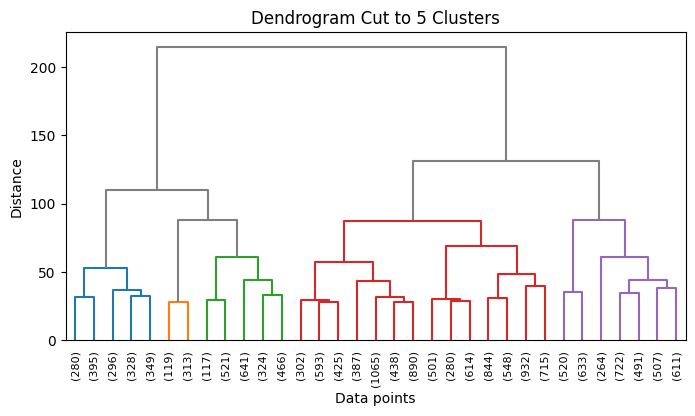

In [40]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Step 4: Compute the distance at which the 4th cluster is formed
# When there are 4 clusters left, the previous merge distance gives that threshold
distance_at_4th_cluster = linkage_matrix[-(n_clusters - 2), 2]



# Step 4: Plot dendrogram
plt.figure(figsize=(8, 4))
dendrogram(
    linkage_matrix,
    color_threshold=distance_at_4th_cluster,
    link_color_func=_color_func(linkage_matrix, labels),
    truncate_mode='lastp',
    p=33,
)
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.title(f"Dendrogram Cut to {n_clusters} Clusters")
# plt.yscale('log')
# plt.grid(axis='both')
plt.show()

In [41]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42, n_components=4)
data_pca = pca.fit_transform(data_scaled)

# Step 3: Create the scatter plot with colormap
plt.figure(figsize=(10, 8))
for i in range(1, n_clusters + 1):
    plt.scatter(data_pca[labels == i, 0], data_pca[labels == i, 1],
                color=custom_colors[i], label=f'Cluster {i}',
                alpha=0.5, s=10,)
# scatter = plt.scatter(
#     data_pca[:, 0], data_pca[:, 1], c=labels,
#     # cmap=colors,
#     alpha=0.5, s=10,
#     # cmap='tab20',
# )  # Color by clusters

# Add labels and title
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.title(f"Hierarchical Clustering with {n_clusters} Clusters")

plt.show()

In [43]:
data.groupby('cluster').count()

KeyError: 'cluster'

In [44]:
labels

array([4, 4, 4, ..., 3, 3, 4], dtype=int32)

In [45]:
# from sklearn.decomposition import PCA

# pca = PCA(random_state=42, n_components=4)
# data_pca = pca.fit_transform(data_scaled)

# colors = [
#     'tab:blue', 'tab:orange', 'tab:green',
#     'tab:red', 'tab:purple', 'tab:brown',
#     'tab:pink', 'tab:gray', 'tab:olive',
#     'tab:cyan'
# ]

# color_mapping = {i: colors[i] for i in range(len(colors))}

# scatter_colors = [color_mapping[label] for label in data['cluster']]


# plt.figure(figsize=(10, 6))
# plt.scatter(
#     data_pca[:, 0], data_pca[:, 1], c=scatter_colors,
#     alpha=0.5, s=10
# )
# plt.grid()
# plt.title("Hierarchical Clustering Visualization (PCA Reduced)")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# # plt.colorbar(label="Cluster Label")
# unique_clusters = np.unique(data['cluster'])
# legend_patches = [
#     mpatches.Patch(color=colors[i], label=f"Cluster {unique_clusters[i]}")
#     for i in range(len(unique_clusters))
# ]
# plt.legend(handles=legend_patches, title="Clusters", loc="best")
# plt.show()

In [46]:
# Perform hierarchical clustering
linked = linkage(data_scaled, method='ward')

In [47]:
def get_linkage_matrix_clustering(model):
    # Create linkage matrix 
    
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.labels_[1:], counts]
    ).astype(float)

    return linkage_matrix

In [48]:
clustering.labels_

array([11275, 10364, 13706, ...,     3,     1,     0])

In [49]:
linkage_matrix = get_linkage_matrix_clustering(clustering)

In [50]:
linkage_matrix

array([[7.2000e+01, 1.3039e+04, 1.0364e+04, 2.0000e+00],
       [8.0000e+01, 1.8910e+03, 1.3706e+04, 2.0000e+00],
       [7.2120e+03, 8.4670e+03, 8.7880e+03, 2.0000e+00],
       ...,
       [3.2850e+04, 3.2857e+04, 3.0000e+00, 4.1490e+03],
       [3.2855e+04, 3.2856e+04, 1.0000e+00, 1.2282e+04],
       [3.2858e+04, 3.2859e+04, 0.0000e+00, 1.6431e+04]])

In [51]:
data.columns

Index(['rating', 'startYear', 'totalCredits', 'numRegions', 'numVotes',
       'totalMedia'],
      dtype='object')

In [52]:
pca.explained_variance_ratio_

array([0.41415007, 0.21892655, 0.13968361, 0.09384967])

In [53]:
data['cluster'] = labels

In [54]:
df['cluster'] = labels

In [55]:
df['titleType'].unique()

array(['tvEpisode', 'videoGame', 'movie', 'tvSeries', 'video',
       'tvMiniSeries', 'short', 'tvMovie', 'tvSpecial', 'tvShort'],
      dtype=object)

In [56]:
df['titleType']

0        tvEpisode
1        videoGame
2            movie
3         tvSeries
4         tvSeries
           ...    
16426        movie
16427        movie
16428        movie
16429        movie
16430        short
Name: titleType, Length: 16431, dtype: object

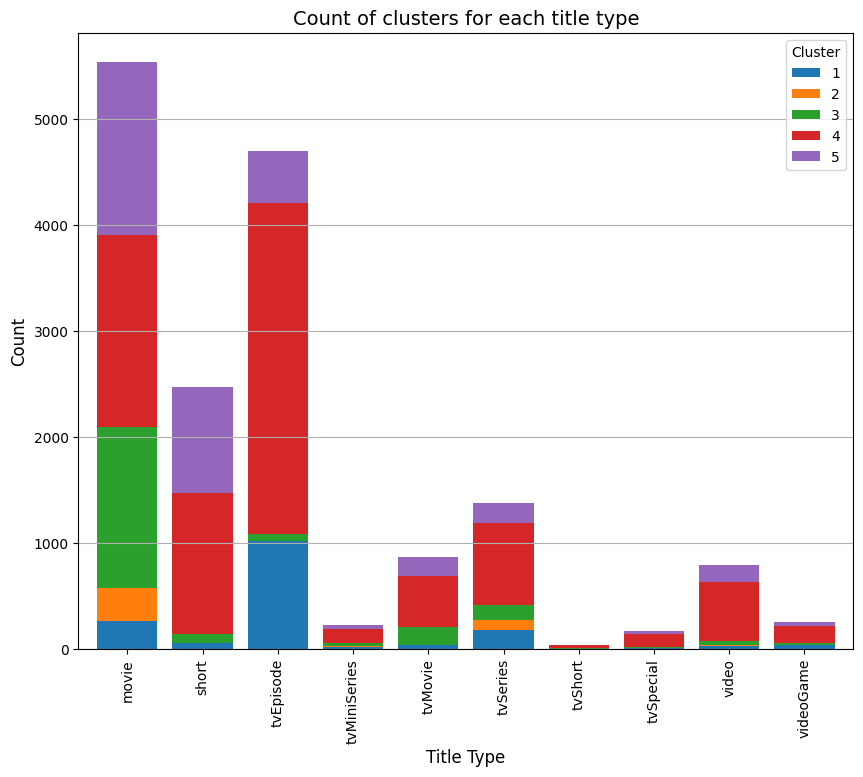

In [57]:
plot_df = df.groupby(
    ['titleType', 'cluster',]).count()['rating'].unstack(fill_value=0)


# plot_df = plot_df.groupby(
#     ['cluster', 'titleType',])['rating'].sum().unstack(fill_value=0)
plot_df['sum'] = plot_df.sum(axis= 1)
# plot_df = plot_df.sort_values(
#     by= 'sum', ascending= False)#.drop(columns= 'sum')

# Step 2: Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Loop through the genres to plot the stacked bars
plot_df.drop(columns= 'sum').plot(kind='bar', stacked=True, ax=ax, width=0.8)

# Set labels and title
ax.set_xlabel('Title Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Count of clusters for each title type', fontsize=14)

# Add legend
ax.legend(title='Cluster')

# Rotate x-tick labels to make them more readable
plt.xticks(rotation=90)

plt.grid(axis= 'y')

# plt.yscale('log')

# Display the plot
plt.show()

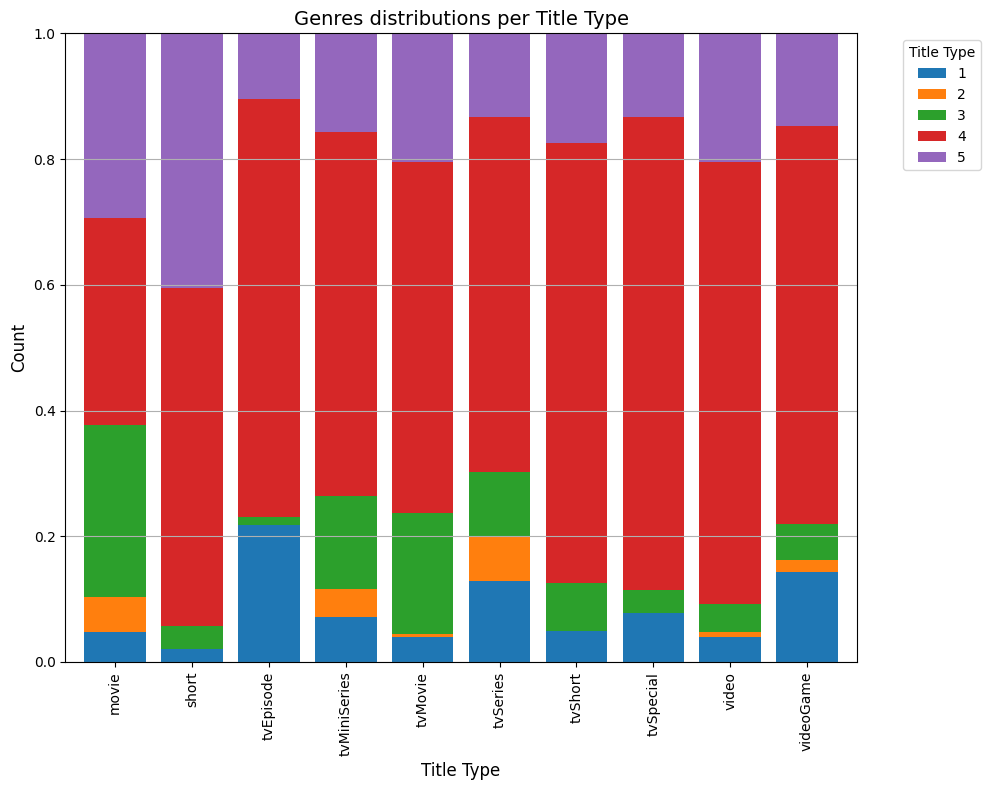

In [58]:
for col in plot_df.columns:
    if col != 'sum':
        plot_df[col] = plot_df[col]/plot_df['sum']

# # Display the plot
# plt.show()
# Step 2: Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Loop through the genres to plot the stacked bars
plot_df.drop(columns= 'sum').plot(kind='bar', stacked=True, ax=ax, width=0.8)

# Set labels and title
ax.set_xlabel('Title Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Genres distributions per Title Type', fontsize=14)

# Add legend outside the plot
ax.legend(title='Title Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set y-axis limit
ax.set_ylim(top=1)

# Rotate x-tick labels to make them more readable
plt.xticks(rotation=90)

# Add gridlines for the y-axis
plt.grid(axis='y')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

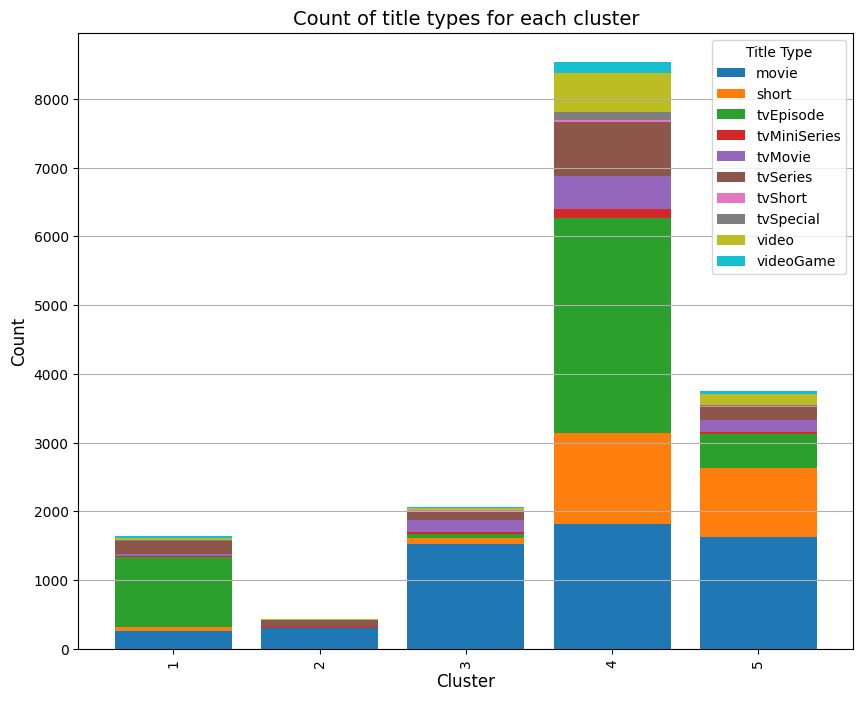

In [59]:
plot_df = df.groupby(
    ['cluster', 'titleType',]).count()['rating'].unstack(fill_value=0)


# plot_df = plot_df.groupby(
#     ['cluster', 'titleType',])['rating'].sum().unstack(fill_value=0)
plot_df['sum'] = plot_df.sum(axis= 1)
# plot_df = plot_df.sort_values(
#     by= 'sum', ascending= False)#.drop(columns= 'sum')

# Step 2: Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Loop through the genres to plot the stacked bars
plot_df.drop(columns= 'sum').plot(kind='bar', stacked=True, ax=ax, width=0.8)

# Set labels and title
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Count of title types for each cluster', fontsize=14)

# Add legend
ax.legend(title='Title Type')

# Rotate x-tick labels to make them more readable
plt.xticks(rotation=90)

plt.grid(axis= 'y')

# plt.yscale('log')

# Display the plot
plt.show()

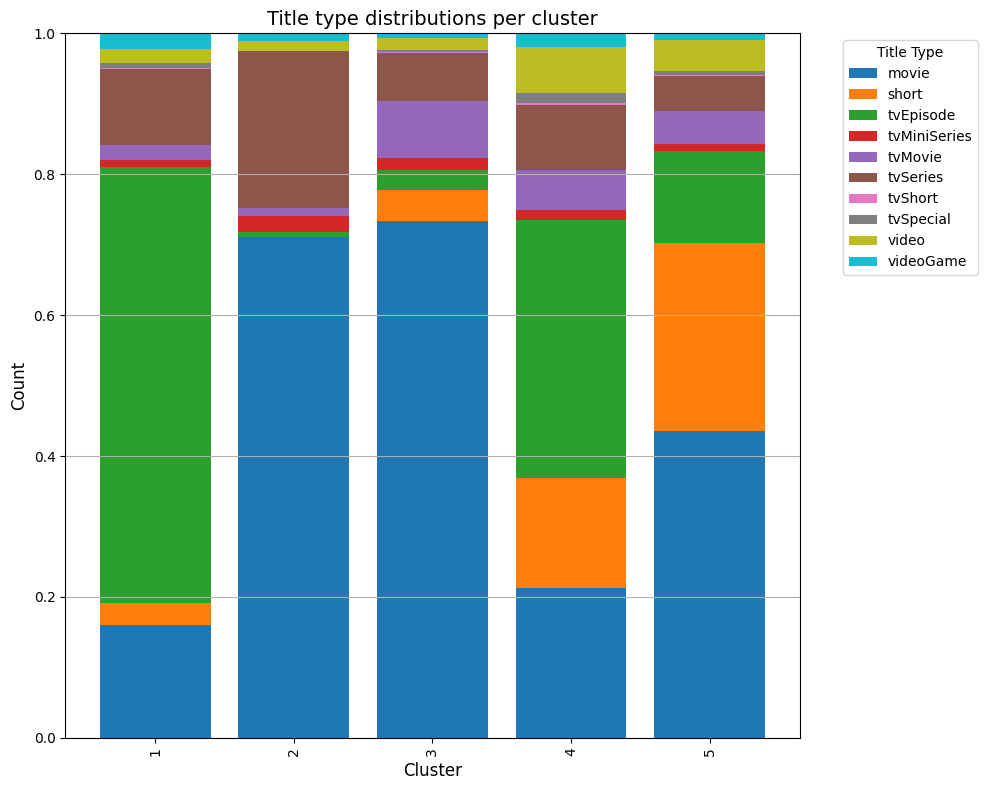

In [60]:
for col in plot_df.columns:
    if col != 'sum':
        plot_df[col] = plot_df[col]/plot_df['sum']

# # Display the plot
# plt.show()
# Step 2: Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Loop through the genres to plot the stacked bars
plot_df.drop(columns= 'sum').plot(kind='bar', stacked=True, ax=ax, width=0.8)

# Set labels and title
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Title type distributions per cluster', fontsize=14)

# Add legend outside the plot
ax.legend(title='Title Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set y-axis limit
ax.set_ylim(top=1)

# Rotate x-tick labels to make them more readable
plt.xticks(rotation=90)

# Add gridlines for the y-axis
plt.grid(axis='y')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

In [61]:
df.groupby('titleType').count()

originalTitle  rating  startYear  endYear  runtimeMinutes  \
titleType                                                                 
movie                  5535    5535       5535        0            4310   
short                  2474    2474       2474        0            1892   
tvEpisode              4698    4698       4698        0            3229   
tvMiniSeries            224     224        224      121             104   
tvMovie                 868     868        868        0             656   
tvSeries               1375    1375       1375      693             699   
tvShort                  40      40         40        0              39   
tvSpecial               166     166        166        0              94   
video                   792     792        792        0             554   
videoGame               259     259        259        0               2   

              awardWins  numVotes  totalImages  totalVideos  totalCredits  \
titleType                                                                   
movie              5535      5535         5535         5535          5535   
short              2474      2474         2474         2474          2474   
tvEpisode          4698      4698         4698         4698          4698   
tvMiniSeries        224       224          224          224           224   
tvMovie             868       868          868          868           868   
tvSeries           1375      1375         1375         1375          1375   
tvShort              40        40           40           40            40   
tvSpecial           166       166          166          166           166   
video               792       792          792          792           792   
videoGame           259       259          259          259           259   

              ...  fill_runtimeMinutes  is_from_Oceania  \
titleType     ...                                         
movie         ...                 5535             5535   
short         ...                 2474             2474   
tvEpisode     ...                 4698             4698   
tvMiniSeries  ...                  224              224   
tvMovie       ...                  868              868   
tvSeries      ...                 1375             1375   
tvShort       ...                   40               40   
tvSpecial     ...                  166              166   
video         ...                  792              792   
videoGame     ...                  259              259   

              is_from_North America  is_from_South America  is_from_Asia  \
titleType                                                                  
movie                          5535                   5535          5535   
short                          2474                   2474          2474   
tvEpisode                      4698                   4698          4698   
tvMiniSeries                    224                    224           224   
tvMovie                         868                    868           868   
tvSeries                       1375                   1375          1375   
tvShort                          40                     40            40   
tvSpecial                       166                    166           166   
video                           792                    792           792   
videoGame                       259                    259           259   

              is_from_Africa  is_from_Europe  totalNominations  totalMedia  \
titleType                                                                    
movie                   5535            5535              5535        5535   
short                   2474            2474              2474        2474   
tvEpisode               4698            4698              4698        4698   
tvMiniSeries             224             224               224         224   
tvMovie                  868             868               868         868   
tvSeries            

In [62]:
df.groupby(['cluster', 'titleType']).count()['rating']

cluster  titleType   
1        movie            264
         short             52
         tvEpisode       1020
         tvMiniSeries      16
         tvMovie           34
         tvSeries         178
         tvShort            2
         tvSpecial         13
         video             32
         videoGame         37
2        movie            307
         tvEpisode          3
         tvMiniSeries      10
         tvMovie            5
         tvSeries          96
         video              6
         videoGame          5
3        movie           1519
         short             89
         tvEpisode         61
         tvMiniSeries      33
         tvMovie          167
         tvSeries         141
         tvShort            3
         tvSpecial          6
         video             35
         videoGame         15
4        movie           1815
         short           1331
         tvEpisode       3123
         tvMiniSeries     130
         tvMovie          484
         tvSeries 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

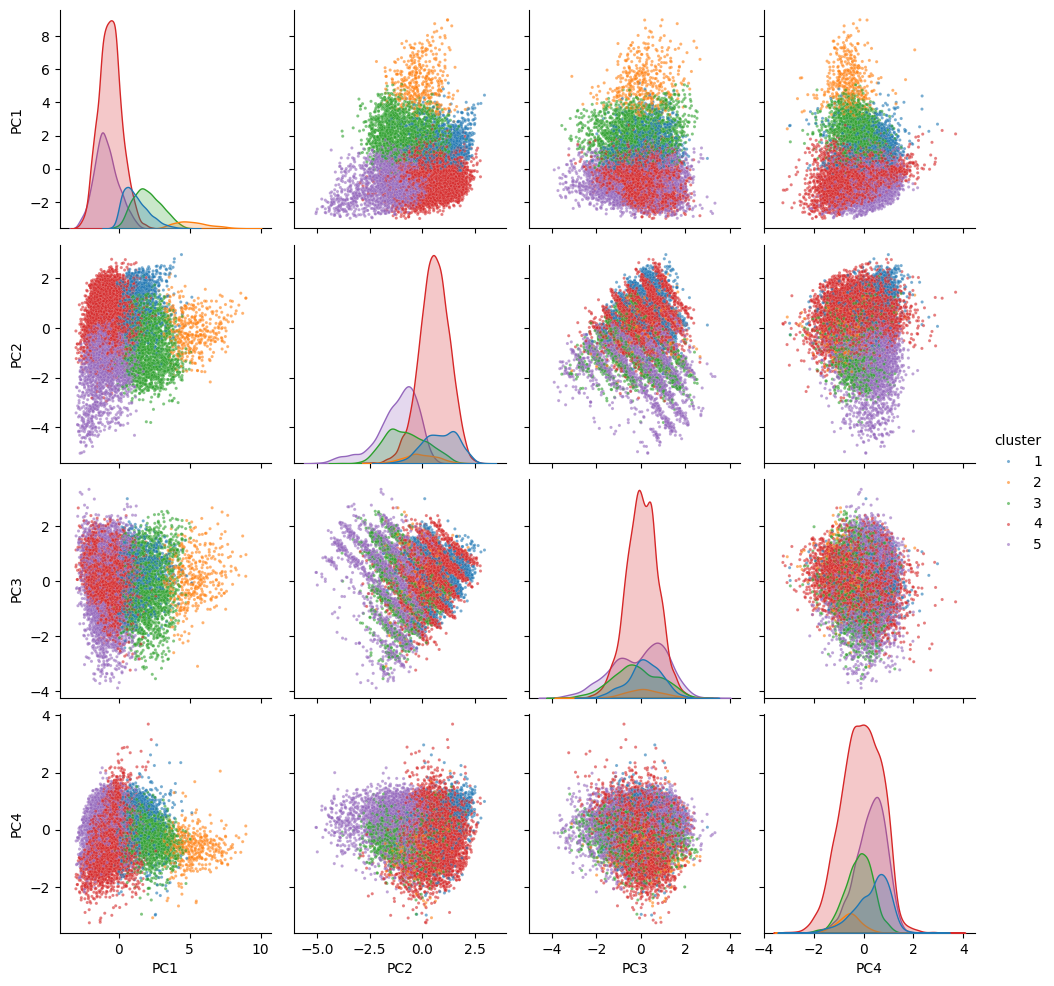

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pca_hierarchical(data_pca):
    # Create a DataFrame with principal components
    pca_columns = [f"PC{i+1}" for i in range(len(data_pca[0]))]
    pca_df = pd.DataFrame(data_pca, columns=pca_columns)
    
    pca_df['cluster'] = labels
    
    # Visualize with Seaborn pairplot
    sns.pairplot(
        data=pca_df,
        vars=["PC1", "PC2", "PC3", "PC4"],
        hue="cluster",
        diag_kind="kde",
        palette="tab10",
        plot_kws={"s": 5, "alpha": 0.6, 'linewidth':0.1},
    )
    
    plt.show()


plot_pca_hierarchical(data_pca)

In [64]:
# Get the loadings (principal component vectors)
loadings = pca.components_.T  # Shape (num_features, num_components)

# Scale loadings for better visualization
scaling_factor = 5  # Adjust for visibility
loadings_scaled = loadings * scaling_factor

plt.figure(figsize=(10, 6))
plt.scatter(
    data_pca[:, 0], data_pca[:, 1], c=scatter_colors,
    alpha=0.5, s=10
)

# Add arrows for each attribute
for i, loading in enumerate(loadings_scaled):
    plt.arrow(
        0, 0, loading[0], loading[1],
        color='black',
        head_width=0.2,head_length=0.3
    )
    plt.text(loading[0] * 1.1, loading[1] * 1.1, numeric_cols[i], color='black')

plt.grid()
plt.title("Hierarchical Clustering Visualization with loadings (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
# plt.colorbar(label="Cluster Label")
unique_clusters = np.unique(data['cluster'])
legend_patches = [
    mpatches.Patch(color=colors[i], label=f"Cluster {unique_clusters[i]}")
    for i in range(len(unique_clusters))
]
plt.legend(handles=legend_patches, title="Clusters", loc="best")
plt.show()

NameError: name 'scatter_colors' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
import plotly.graph_objects as go
from matplotlib.colors import to_rgb

# Define colors for clusters
# cluster_colors = ["red", "green", "blue"]
# data_pca["color"] = data_pca["cluster"].map(lambda c: cluster_colors[c])

pca_columns = [f"PC{i+1}" for i in range(len(data_pca[0]))]

pca_df = pd.DataFrame(data_pca, columns=pca_columns)
    
pca_df['cluster'] = data['cluster']

pca_df['color'] = [to_rgb(color_name) for color_name in scatter_colors]

# Create scatter plot trace
scatter_trace = go.Scatter3d(
    x=pca_df['PC1'], y=pca_df['PC2'], z=pca_df['PC3'],
    mode="markers",
    marker=dict(
        size=1, color=pca_df['color'], opacity=0.5, 
        # line=dict(width=0.5, color="black")
    ),
    # text=data_pca.index,  # Hover info
    name="Data Points"
)

# Create loading vectors as arrows
arrow_traces = []
for i in range(len(loadings_scaled)):
    arrow_traces.append(
        go.Scatter3d(
            x=[0, loadings_scaled[i, 0]],
            y=[0, loadings_scaled[i, 1]],
            z=[0, loadings_scaled[i, 2]],
            mode="lines+text",
            line=dict(color="black", width=3),
            text=[None, data.columns[i]],  # Label at the end of arrow
            textposition="top center",
            name=data.columns[i]
        )
    )

# Combine traces
fig = go.Figure(data=[scatter_trace] + arrow_traces)

# Customize layout
fig.update_layout(
    title="Interactive 3D PCA Scatter Plot with Loadings",
    scene=dict(
        xaxis_title="PC1",
        yaxis_title="PC2",
        zaxis_title="PC3"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show plot
fig.show()

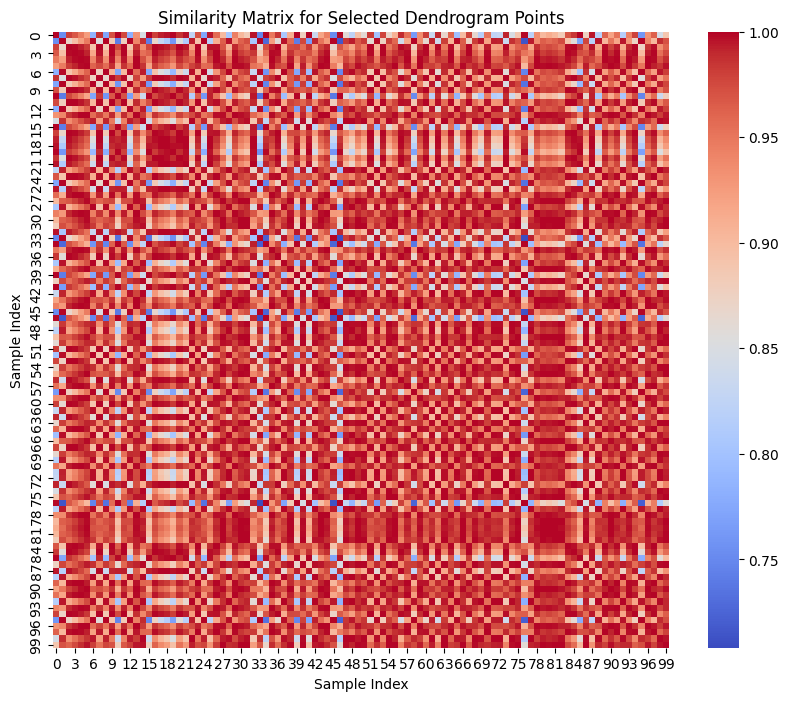

In [ ]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics.pairwise import cosine_similarity

# Cut the dendrogram at k clusters
k = 100  # Adjust this number based on how much you want to keep
cluster_labels = fcluster(linked, k, criterion='maxclust')  # Get k cluster assignments

# Choose one representative per cluster (e.g., first point in each cluster)
selected_indices = []
for cluster_id in np.unique(cluster_labels):
    idx = np.where(cluster_labels == cluster_id)[0][0]  # First point in cluster
    selected_indices.append(idx)

# Subset the data based on the selected points
X_subset = linked[selected_indices]

# Compute similarity matrix for subset
similarity_matrix = cosine_similarity(X_subset)  # Or use Euclidean with pdist

# Plot similarity heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="coolwarm", square=True, linewidths=0)
plt.title("Similarity Matrix for Selected Dendrogram Points")
plt.xlabel("Sample Index")
plt.ylabel("Sample Index")
plt.show()

In [ ]:
full_tree = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
model = full_tree.fit(data_scaled)

In [ ]:
def get_linkage_matrix(model):
    # Create linkage matrix 
    
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    return linkage_matrix

def plot_dendrogram(model, **kwargs):
    linkage_matrix = get_linkage_matrix(model)
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
len(full_tree.distances_)

16430

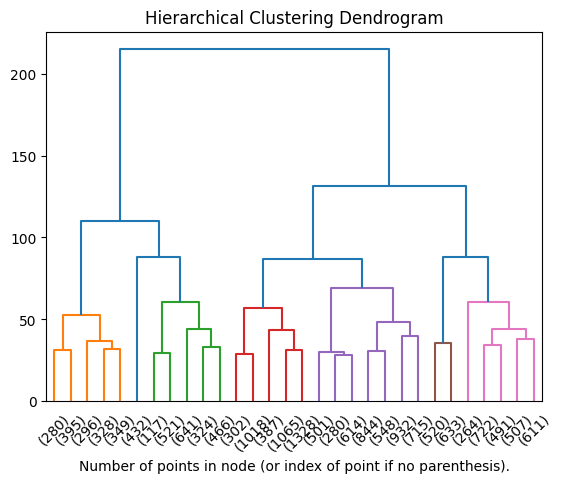

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(full_tree, truncate_mode='lastp', color_threshold=75)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

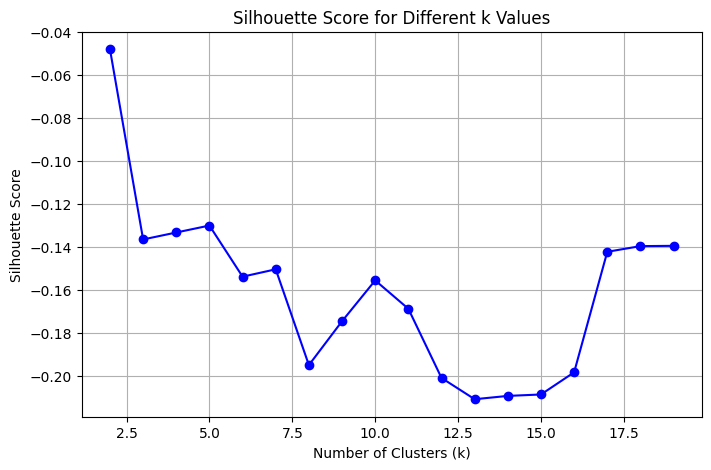

In [66]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 20):
    # cluster_labels = fcluster(linked, k, criterion='maxclust')  # Assign cluster labels
    clustering = AgglomerativeClustering(n_clusters=k, linkage='complete')
    data['cluster'] = clustering.fit_predict(data_scaled)

    # Compute Silhouette Scores
    sil_scores.append(silhouette_score(data, data['cluster'], metric='euclidean'))
    
plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), sil_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k Values")
plt.grid(True)
plt.show()